In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array

path = glob.glob("/content/drive/MyDrive/NN DL Project/dataset/train1/*")
imagenames_list = []
image_labels = []
for folder in path:
  for f in glob.glob(folder+"/*.jpg"):
    image_labels.append(folder[-1])
    imagenames_list.append(f)

print(len(imagenames_list))

read_images = []     
i = 0   
for image in imagenames_list:
  i += 1
 
  read_images.append(load_img(image,color_mode='rgb', target_size=(224, 224)))

260


In [ ]:
# prepare x_train and y_train

import tensorflow as tf
image_data = []
for i in range(len(read_images)):
  img_data = tf.keras.utils.img_to_array(read_images[i])
  # img_data = np.expand_dims(img_data, axis = 0)
  img_data = preprocess_input(img_data)

  image_data.append(img_data)

x_train = numpy.asarray(image_data)


y_train = []
for i in range(len(image_labels)):
  y = ord(image_labels[i]) - 65
  y_train.append(y)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=26)

In [ ]:
# split train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

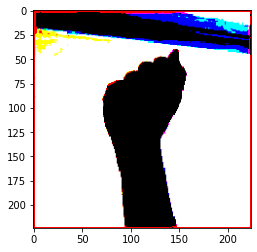

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image_data[0])

In [ ]:
# add additional layers to the base model

CLASSES = 26
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from keras import layers, models
from keras.callbacks import ModelCheckpoint
from keras.models import  load_model

def get_model(base_model):
  
  model = models.Sequential()
  model.add(base_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(4096))  
  model.add(layers.Dense(CLASSES, activation='softmax'))

  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
  
  return model

In [ ]:
# base model VGG1, Trained on ASL, Initialized with ImageNet

IMG_SIZE = (224,224)

base_model_vgg1 = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
)

for layer in base_model_vgg1.layers:
  layer.trainable = True

cascade_model_1a = get_model(base_model_vgg1)

In [ ]:
# cascade_model_1a.layers[0].get_weights()

In [ ]:
cascade_model_1a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 4096)              102764544 
                                                                 
 dense_5 (Dense)             (None, 26)                106522    
                                                                 
Total params: 117,585,754
Trainable params: 117,585,754
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## load the validation data and preprocess it

# path = glob.glob("/content/drive/MyDrive/NN DL Project/dataset/dev1/*")
# imagenames_list1 = []
# image_labels1 = []
# for folder in path:
#   for f in glob.glob(folder+"/*.jpg"):
#     image_labels1.append(folder[-1])
#     imagenames_list1.append(f)

# print(len(imagenames_list1))

# read_valid = []     
# i = 0   
# for image in imagenames_list1:
#   i += 1
 
#   read_valid.append(load_img(image,color_mode='rgb', target_size=(224, 224)))

In [ ]:
# import tensorflow as tf
# valid_data = []
# for i in range(len(read_valid)):
#   img_data = tf.keras.utils.img_to_array(read_valid[i])
#   # img_data = np.expand_dims(img_data, axis = 0)
#   img_data = preprocess_input(img_data)

#   valid_data.append(img_data)

# x_valid = numpy.asarray(valid_data)


# y_valid = []
# for i in range(len(image_labels1)):
#   y = ord(image_labels1[i]) - 65
#   y_valid.append(y)

# y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=26)

In [ ]:
cascade_model_1a.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
4/4 [==============================] - 4s 686ms/step - loss: 101.1807 - accuracy: 0.0659
Epoch 2/10
4/4 [==============================] - 3s 674ms/step - loss: 5.7614 - accuracy: 0.0220
Epoch 3/10
4/4 [==============================] - 3s 669ms/step - loss: 3.9670 - accuracy: 0.0385
Epoch 4/10
4/4 [==============================] - 3s 691ms/step - loss: 5.8888 - accuracy: 0.0385
Epoch 5/10
4/4 [==============================] - 3s 680ms/step - loss: 3.3430 - accuracy: 0.0440
Epoch 6/10
4/4 [==============================] - 3s 669ms/step - loss: 3.3033 - accuracy: 0.0275
Epoch 7/10
4/4 [==============================] - 3s 665ms/step - loss: 3.6284 - accuracy: 0.0495
Epoch 8/10
4/4 [==============================] - 3s 641ms/step - loss: 3.2564 - accuracy: 0.0495
Epoch 9/10
4/4 [==============================] - 3s 640ms/step - loss: 3.2583 - accuracy: 0.0495
Epoch 10/10
4/4 [==============================] - 3s 635ms/step - loss: 3.2577 - accuracy: 0.0495


In [ ]:
# cascade_model_1a.layers[0].get_weights()

In [ ]:
# y_test_pred = cascade_model_1a.predict(x_test)

In [ ]:
# y_test_pred

In [ ]:
# y_pred_test = []
# for i in y_test_pred:
#   k = max(i)
#   y_pred_test.append(k)

In [ ]:
# extract weights from all the layers in first model of first cascade

weights_model_1a = []
for layer in cascade_model_1a.layers:
    weights = layer.get_weights()
    weights_model_1a.append(weights)

In [ ]:
# create a copy of the weight matrices from the first model in the first cascade series
weight_list_copy = weights_model_1a

In [ ]:
# train the second model VGG in the cascade with the weights set from the first model VGG
# base model VGG2, Trained on ASL, Initialized with ASL weights

IMG_SIZE = (224,224)

base_model_vgg_1 = VGG16( 
    weights = 'imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

for layer in base_model_vgg_1.layers:
  layer.trainable = True

## iterate through base model layer names:

layer_count = 0
for layer in base_model_vgg_1.layers:
  if "pool" not in layer.name and "input" not in layer.name:
    weights = weights_model_1a[0].pop(0)
    bias = weights_model_1a[0].pop(0)

    # set weights and biases for base model 1
    base_model_vgg_1.layers[layer_count].set_weights([weights,bias])
  layer_count += 1

cascade_model_1b = get_model(base_model_vgg_1)

In [ ]:
cascade_model_1b.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
4/4 [==============================] - 4s 631ms/step - loss: 3.2633 - accuracy: 0.0220
Epoch 2/10
4/4 [==============================] - 3s 641ms/step - loss: 3.3207 - accuracy: 0.0385
Epoch 3/10
4/4 [==============================] - 3s 655ms/step - loss: 3.2882 - accuracy: 0.0275
Epoch 4/10
4/4 [==============================] - 3s 653ms/step - loss: 4.0721 - accuracy: 0.0604
Epoch 5/10
4/4 [==============================] - 3s 652ms/step - loss: 3.2834 - accuracy: 0.0385
Epoch 6/10
4/4 [==============================] - 3s 651ms/step - loss: 3.5292 - accuracy: 0.0549
Epoch 7/10
4/4 [==============================] - 3s 648ms/step - loss: 3.3573 - accuracy: 0.0385
Epoch 8/10
4/4 [==============================] - 3s 647ms/step - loss: 3.2513 - accuracy: 0.0495
Epoch 9/10
4/4 [==============================] - 3s 641ms/step - loss: 3.2486 - accuracy: 0.0495
Epoch 10/10
4/4 [==============================] - 3s 638ms/step - loss: 3.2476 - accuracy: 0.0495


In [ ]:
# cascade_model_1b.layers[0].get_weights()

In [ ]:
y_pred1 = cascade_model_1b.predict(x_test)

3/3 [==============================] - 0s 166ms/step


In [ ]:
y_pred1

array([[0.04384718, 0.03175082, 0.0438118 , ..., 0.0376253 , 0.03757302,
        0.04763353],
       [0.04384718, 0.03175082, 0.0438118 , ..., 0.0376253 , 0.03757302,
        0.04763353],
       [0.04384718, 0.03175082, 0.0438118 , ..., 0.0376253 , 0.03757302,
        0.04763353],
       ...,
       [0.02053278, 0.01667963, 0.03359864, ..., 0.00106585, 0.02752056,
        0.01818701],
       [0.04384718, 0.03175082, 0.0438118 , ..., 0.0376253 , 0.03757302,
        0.04763353],
       [0.04289652, 0.03126816, 0.04478122, ..., 0.03000781, 0.03782385,
        0.0466137 ]], dtype=float32)

In [ ]:
# for i, layer in enumerate(cascade_model_1b.layers):
#     print(i, layer.name, layer.trainable)

In [ ]:
# weights_model_1b = []
# for layer in cascade_model_1b.layers:
#     weights = layer.get_weights()
#     weights_model_1b.append(weights)

In [ ]:
y_pred1_list = []
for i in y_pred1:
  k = max(i)
  y_pred1_list.append(k)

In [ ]:
y_pred1_list

[0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.04724071,
 0.047796655,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.04828316,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.047166772,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.047136586,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048162542,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.0475755,
 0.048319813,
 0.45785916,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.0470563,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.048319813,
 0.050769087,
 0.048319813,
 0.048319813,
 0.048319813,

In [ ]:
# #[[[vgg_values]],[flatten],[Dense],[softmax]]
# len(weights_list[0])  #----> len(VGG)
# len(weights_list[0][0]) # First layer of VGG shape --> (3,3,3,64)  --- > channels R, G, B
# #3 
# len(weights_list[0][0][0]) # First layer of VGG shape --> (3,3,3,64)  --- > channel R, last index if it changes to 1 gives G, if its 2 it gives B

In [ ]:
##### R values #####
# []
# 1st sublist[R] - 1st sublist = first row first column of all 64 filters
# 1st sublist[R] - 2nd sublist = first row, second column of all 64 filters
# 1st sublist[R]  - 3rd sublist = first row ,third column of all 64 filters

In [ ]:
# []
# 2st sublist[R] - 1st sublist = second row first column of all 64 filters
# 2st sublist[R] - 2nd sublist = second row, second column of all 64 filters
# 2st sublist[R]  - 3rd sublist = second row ,third column of all 64 filters

In [ ]:
# []
# 3st sublist[R] - 1st sublist = third row first column of all 64 filters
# 3st sublist[R] - 2nd sublist = third row, second column of all 64 filters
# 3st sublist[R]  - 3rd sublist = third row ,third column of all 64 filters

In [ ]:
# First row of the R channels filters 
# weights_list[0][0][0][0]

In [ ]:
# first sublist is R, second sublist is G and third sublist is B, 
# each sublist within shows 1st row, 2nd row and 3rd row

# weights_1 = weights_list[0][0]
# weights_1

In [ ]:
## model [0][0] - 1st layer weights      ## base_model_1 [0][0] - inputs
## model [0][1] - 1st layer bias         ## base_model_1 [0][1] - 1st layer weights + bias,

## model [0][2] - 2nd layer weights      ## base_model_1 [0][2] - 2nd layer weights + bias, 2,3
## model [0][3] - 2nd layer bias         
                                         ## base_model_1 [0][3] - maxpool

## model [0][4] - 3rd layer weights      ## base_model_1 [0][4] - 3rd layer weights + bias, 4,5
## model [0][5] - 3rd layer bias         

## model [0][6] - 4th layer weights      ## base_model_1 [0][4] - 4th layer weights + bias, 6,7
## model [0][7] - 4th layer bias 

## model [0][8] - 4th layer weights      ## base_model_1 [0][5] - 4th layer weights + bias, 8,9
## model [0][9] - 4th layer bias 

In [ ]:
## base_model [0][0] - 1st layer weights      ## base_model_1 [0][0] - inputs
## base_model [0][1] - 1st layer bias         ## base_model_1 [0][1] - 1st layer weights + bias, 0,1

## base_model [0][2] - 2nd layer weights      ## base_model_1 [0][2] - 2nd layer weights + bias, 2,3
## base_model [0][3] - 2nd layer bias         

## base_model [0][4] - 3rd layer weights      ## base_model_1 [0][3] - 3rd layer weights + bias, 4,5
## base_model [0][5] - 3rd layer bias         

## base_model [0][6] - 4th layer weights      ## base_model_1 [0][4] - 4th layer weights + bias, 6,7
## base_model [0][7] - 4th layer bias 

## base_model [0][8] - 4th layer weights      ## base_model_1 [0][5] - 4th layer weights + bias, 8,9
## base_model [0][9] - 4th layer bias 

In [ ]:
## <<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [ ]:
# test_model = VGG16(
#     weights='imagenet', 
#     include_top=False, 
#     input_shape=(224,224,3)
# )

In [ ]:
# import numpy as np
# import random
# test_weights = np.random.rand(3,3,3,64)
# test_bias = np.random.rand(64)

In [ ]:
# test_weights

In [ ]:
# test_weights[:,:,:,0]

In [ ]:
# layer = test_model.layers[1]
# t_weights, t_bias = layer.get_weights()

In [ ]:
# test_model.layers[1].set_weights([test_weights,test_bias])

In [ ]:
# layer = test_model.layers[1]
# t1_weights, t1_bias = layer.get_weights()

In [ ]:
# t1_weights[:,:,:,0]

In [ ]:
## build second base model MobileNet

IMG_SIZE = (224,224)

from keras.applications.mobilenet import MobileNet
# from keras.applications.vgg16 import VGG16

base_model_mnet1 = MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
)

for layer in base_model_mnet1.layers:
  layer.trainable = True

cascade_model_2a = get_model(base_model_mnet1)

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
# cascade_model_2a.summary()

In [ ]:
cascade_model_2a.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
6/6 [==============================] - 14s 431ms/step - loss: 276.3517 - accuracy: 0.0808
Epoch 2/10
6/6 [==============================] - 2s 307ms/step - loss: 225.1212 - accuracy: 0.3846
Epoch 3/10
6/6 [==============================] - 2s 308ms/step - loss: 26.5048 - accuracy: 0.5538
Epoch 4/10
6/6 [==============================] - 2s 318ms/step - loss: 9.5410 - accuracy: 0.5077
Epoch 5/10
6/6 [==============================] - 2s 313ms/step - loss: 3.4665 - accuracy: 0.5962
Epoch 6/10
6/6 [==============================] - 2s 309ms/step - loss: 1.9993 - accuracy: 0.6808
Epoch 7/10
6/6 [==============================] - 2s 312ms/step - loss: 1.0503 - accuracy: 0.7769
Epoch 8/10
6/6 [==============================] - 2s 304ms/step - loss: 1.0699 - accuracy: 0.8577
Epoch 9/10
6/6 [==============================] - 2s 309ms/step - loss: 0.5620 - accuracy: 0.8962
Epoch 10/10
6/6 [==============================] - 2s 300ms/step - loss: 1.2737 - accuracy: 0.9038


In [ ]:
# base_model_mnet1.layers[1].get_weights()[0]

In [ ]:
weights_model_2a = []
for layer in cascade_model_2a.layers:
    weights = layer.get_weights()
    weights_model_2a.append(weights)

In [ ]:
weights_model_2a[0].pop(0)

array([-0.45874482,  0.4004036 ,  2.1788259 , -1.5107197 , -0.25976956,
        0.78895545,  3.1348782 ,  3.0787225 , -0.9286753 ,  2.372138  ,
        2.637951  ,  0.10719169,  3.1926246 ,  2.9665697 ,  2.3196213 ,
        0.01840254, -2.8780987 ,  2.1552548 ,  3.108966  ,  3.4835675 ,
       -0.6234294 , -1.5791819 ,  1.3598745 ,  2.2029142 ,  0.8098446 ,
        3.1662858 ,  3.2110217 ,  2.1871395 ,  3.4080527 ,  2.5331101 ,
        1.8108183 ,  0.95507294], dtype=float32)

In [ ]:
base_model_mnet2.layers[2].get_weights()[3]

array([1.04352897e-24, 5.85568368e-01, 7.62584955e-02, 7.89068080e-25,
       7.00037583e-25, 7.17683554e-01, 1.71345758e+00, 1.69794887e-01,
       1.42590839e-24, 7.59507418e-01, 2.59733319e-01, 1.44171874e-24,
       3.65004927e-01, 2.92280912e-01, 8.65899026e-02, 3.31882092e-07,
       7.83329570e-24, 7.74741292e-01, 1.78299999e+00, 1.67571378e+00,
       2.25750613e-24, 1.84713963e-25, 5.94701469e-01, 1.60430059e-01,
       2.90743774e-03, 2.76636004e-01, 1.13342500e+00, 1.08743705e-01,
       4.88042235e-02, 7.01505303e-01, 2.34327093e-02, 3.16994556e-04],
      dtype=float32)

In [ ]:
base_model_mnet2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
# create a copy of the weight matrices from the first model in the first cascade series
weight_list_copy1 = weights_model_2a

In [ ]:
# train the second model VGG in the cascade with the weights set from the first model VGG
# base model VGG2, Trained on ASL, Initialized with ASL weights

IMG_SIZE = (224,224)

base_model_mnet2 = MobileNet(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
)

for layer in base_model_mnet2.layers:
  layer.trainable = True

## iterate through base model layer names:

layer_count = 0
for layer in base_model_mnet2.layers:
  if "pool" not in layer.name and "input" not in layer.name and "pad" not in layer.name and "relu" not in layer.name:
    if "bn" in layer.name:
      bn_weights = []
      for i in range(0,4):
        bn_weights.append(weights_model_2a[0].pop(0))
      base_model_mnet2.layers[layer_count].set_weights(bn_weights)
    else:
      weights = weights_model_2a[0].pop(0)
      base_model_mnet2.layers[layer_count].set_weights([weights])
  layer_count += 1

cascade_model_2b = get_model(base_model_mnet2)

In [ ]:
weights_model_2b = []
for layer in cascade_model_2b.layers:
    weights = layer.get_weights()
    weights_model_2b.append(weights)

In [ ]:
weights_model_2a[0][0]

array([[[[ 8.87084053e-14,  3.10456216e-01,  1.19768865e-02,
           1.65614850e-13,  1.67507152e-14,  2.34001994e-01,
          -2.26508051e-01, -3.00231874e-01, -4.32953903e-15,
           8.31794664e-02,  3.82144272e-01,  9.35078702e-14,
           1.51329696e-01,  1.45518705e-01,  7.76224071e-04,
           4.56319394e-05, -5.14434686e-13, -1.81066364e-01,
           3.91259849e-01, -2.56163597e-01,  1.27436947e-13,
           8.86099631e-15, -6.82408139e-02,  2.79617012e-01,
           4.83191898e-03, -2.80103367e-03,  3.02205980e-01,
          -1.75270274e-01, -5.63850403e-01,  2.63869226e-01,
          -3.97485703e-01,  1.05031405e-03],
         [ 1.05321493e-13, -3.48717928e-01,  4.29739803e-02,
           1.44252747e-13,  5.91760866e-14,  1.73492715e-01,
          -1.12534128e-01,  9.30038318e-02,  8.52340540e-15,
          -1.89308435e-01,  3.77960861e-01,  1.19941383e-13,
           1.47564307e-01,  1.74533039e-01,  2.17310600e-02,
           4.60369374e-05, -5.77872602e-

In [ ]:
weights_model_2b[0][0]

array([[[[ 8.87084053e-14,  3.10456216e-01,  1.19768865e-02,
           1.65614850e-13,  1.67507152e-14,  2.34001994e-01,
          -2.26508051e-01, -3.00231874e-01, -4.32953903e-15,
           8.31794664e-02,  3.82144272e-01,  9.35078702e-14,
           1.51329696e-01,  1.45518705e-01,  7.76224071e-04,
           4.56319394e-05, -5.14434686e-13, -1.81066364e-01,
           3.91259849e-01, -2.56163597e-01,  1.27436947e-13,
           8.86099631e-15, -6.82408139e-02,  2.79617012e-01,
           4.83191898e-03, -2.80103367e-03,  3.02205980e-01,
          -1.75270274e-01, -5.63850403e-01,  2.63869226e-01,
          -3.97485703e-01,  1.05031405e-03],
         [ 1.05321493e-13, -3.48717928e-01,  4.29739803e-02,
           1.44252747e-13,  5.91760866e-14,  1.73492715e-01,
          -1.12534128e-01,  9.30038318e-02,  8.52340540e-15,
          -1.89308435e-01,  3.77960861e-01,  1.19941383e-13,
           1.47564307e-01,  1.74533039e-01,  2.17310600e-02,
           4.60369374e-05, -5.77872602e-

In [ ]:
base_model_mnet2.layers[2]

In [ ]:
cascade_model_2b.fit(x_train, y_train, batch_size=50, epochs=10)

Epoch 1/10
6/6 [==============================] - 5s 293ms/step - loss: 5.2130 - accuracy: 0.2692
Epoch 2/10
6/6 [==============================] - 2s 291ms/step - loss: 2.2316 - accuracy: 0.5731
Epoch 3/10
6/6 [==============================] - 2s 293ms/step - loss: 1.7610 - accuracy: 0.7000
Epoch 4/10
6/6 [==============================] - 2s 300ms/step - loss: 1.3759 - accuracy: 0.7846
Epoch 5/10
6/6 [==============================] - 2s 291ms/step - loss: 0.9311 - accuracy: 0.8462
Epoch 6/10
6/6 [==============================] - 2s 291ms/step - loss: 0.9800 - accuracy: 0.8538
Epoch 7/10
6/6 [==============================] - 2s 297ms/step - loss: 0.9535 - accuracy: 0.8654
Epoch 8/10
6/6 [==============================] - 2s 297ms/step - loss: 1.5293 - accuracy: 0.8538
Epoch 9/10
6/6 [==============================] - 2s 300ms/step - loss: 1.6816 - accuracy: 0.8346
Epoch 10/10
6/6 [==============================] - 2s 295ms/step - loss: 1.7464 - accuracy: 0.8538


In [ ]:
## preprocess test data

import cv2
import numpy
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img, img_to_array

path = glob.glob("/content/drive/MyDrive/NN DL Project/dataset/test1/*")

test_list = []
test_labels = []
for folder in path:
  for f in glob.glob(folder+"/*.JPG"):
    test_labels.append(folder[-1])
    test_list.append(f)

print(len(test_list))

test_images = []     
i = 0   
for image in test_list:
  i += 1
  test_images.append(load_img(image,color_mode='rgb', target_size=(224, 224)))

100


In [ ]:
# prepare x_test and y_test

import tensorflow as tf
test_data = []
for i in range(len(test_images)):
  img_data = tf.keras.utils.img_to_array(read_images[i])
  # img_data = np.expand_dims(img_data, axis = 0)
  img_data = preprocess_input(img_data)

  test_data.append(img_data)

x_test = numpy.asarray(test_data)

y_test = test_labels
# for i in range(len(test_labels)):
#   y = ord(test_labels[i]) - 65
#   y_test.append(y)

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_pred2 = cascade_model_2b.predict(x_test)

4/4 [==============================] - 1s 94ms/step


In [ ]:
y_pred2_list = []
for i in y_pred2:
  k = max(i)
  y_pred2_list.append(k)

In [ ]:
y_pred2_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999782,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9057544,
 0.99999905,
 0.9430017,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999917,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99642074,
 0.90007573,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99996114,
 1.0,
 0.9112779,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98737913,
 0.99999976,
 1.0,
 0.9802127,
 0.9998965,
 1.0,
 0.99854785,
 0.9997465,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.71097565,
 0.99993587,
 1.0,
 1.0,
 1.0,
 0.93842536,
 0.9859433,
 1.0,
 0.9998716,
 1.0,
 1.0]

In [ ]:
# train third pre-trained model Resnet

from keras.applications.resnet import ResNet50

base_model_res1 = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
)

for layer in base_model_res1.layers:
  layer.trainable = True

cascade_model_3a = get_model(base_model_res1)

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
cascade_model_3a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4096)              411045888 
                                                                 
 dense_1 (Dense)             (None, 26)                106522    
                                                                 
Total params: 434,740,122
Trainable params: 434,687,002
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
cascade_model_3a.fit(x_train, y_train, batch_size=20, epochs=1)

10/10 [==============================] - 18s 381ms/step - loss: 224.2200 - accuracy: 0.0549


In [ ]:
weights_model_3a = []
for layer in cascade_model_3a.layers:
    weights = layer.get_weights()
    weights_model_3a.append(weights)

In [ ]:
weights_model_3b = []
for layer in cascade_model_3b.layers:
    weights = layer.get_weights()
    weights_model_3b.append(weights)

NameError: ignored

In [ ]:
weights_model_3a[0][0]

array([[[[ 2.35326849e-02, -3.72277689e-03, -4.55610873e-03, ...,
          -1.05900625e-02, -5.29576838e-02, -7.82884937e-03],
         [-6.10534975e-04,  6.02594912e-02, -4.28594835e-03, ...,
           1.87867675e-02,  1.41500551e-02,  1.03820655e-02],
         [-9.61446762e-03, -3.90937068e-02, -4.90550417e-03, ...,
           8.44946969e-03,  3.58614102e-02, -5.69091993e-04]],

        [[ 1.36505617e-02,  1.09791465e-03,  1.15924440e-05, ...,
          -4.92639933e-03, -7.68625038e-03,  1.22280410e-02],
         [ 1.22571392e-02,  6.13338128e-02, -1.76952337e-03, ...,
           2.30031051e-02,  1.26451869e-02, -2.56274603e-02],
         [ 1.18673351e-02, -2.91654281e-02, -1.98429381e-03, ...,
           8.86326469e-03, -1.16986614e-02, -1.69127192e-02]],

        [[ 1.18864970e-02, -2.44111544e-03,  7.70024210e-03, ...,
           1.03620241e-05, -1.55128975e-04,  1.00706157e-03],
         [ 2.95442957e-02,  6.03139363e-02,  6.08638255e-03, ...,
           1.91552863e-02,  1.9034

In [ ]:
weights_model_3b[0][0]

array([[[[ 2.35326849e-02, -3.72277689e-03, -4.55610873e-03, ...,
          -1.05900625e-02, -5.29576838e-02, -7.82884937e-03],
         [-6.10534975e-04,  6.02594912e-02, -4.28594835e-03, ...,
           1.87867675e-02,  1.41500551e-02,  1.03820655e-02],
         [-9.61446762e-03, -3.90937068e-02, -4.90550417e-03, ...,
           8.44946969e-03,  3.58614102e-02, -5.69091993e-04]],

        [[ 1.36505617e-02,  1.09791465e-03,  1.15924440e-05, ...,
          -4.92639933e-03, -7.68625038e-03,  1.22280410e-02],
         [ 1.22571392e-02,  6.13338128e-02, -1.76952337e-03, ...,
           2.30031051e-02,  1.26451869e-02, -2.56274603e-02],
         [ 1.18673351e-02, -2.91654281e-02, -1.98429381e-03, ...,
           8.86326469e-03, -1.16986614e-02, -1.69127192e-02]],

        [[ 1.18864970e-02, -2.44111544e-03,  7.70024210e-03, ...,
           1.03620241e-05, -1.55128975e-04,  1.00706157e-03],
         [ 2.95442957e-02,  6.03139363e-02,  6.08638255e-03, ...,
           1.91552863e-02,  1.9034

In [ ]:
base_model_res1.layers[2].get_weights()[0].shape

(7, 7, 3, 64)

In [ ]:
# train the second model VGG in the cascade with the weights set from the first model VGG
# base model VGG2, Trained on ASL, Initialized with ASL weights

IMG_SIZE = (224,224)

base_model_res2 = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(224,224,3)
)
for layer in base_model_res2.layers:
  layer.trainable = True

## iterate through base model layer names:

layer_count = 0
for layer in base_model_res2.layers:
  if "pool" not in layer.name and "input" not in layer.name and "pad" not in layer.name and "relu" not in layer.name and "add" not in layer.name and "out" not in layer.name:
    if "bn" in layer.name:
      bn_weights = []
      for i in range(0,4):
        bn_weights.append(weights_model_3a[0].pop(0))
      base_model_res2.layers[layer_count].set_weights(bn_weights)
    else:
      weights = weights_model_3a[0].pop(0)
      bias = weights_model_3a[0].pop(0)
      base_model_res2.layers[layer_count].set_weights([weights,bias])
  layer_count += 1

cascade_model_3b = get_model(base_model_res2)

In [ ]:
cascade_model_3b.fit(x_train, y_train, batch_size=20, epochs=1)

10/10 [==============================] - 8s 283ms/step - loss: 42.0174 - accuracy: 0.0989


In [ ]:
y_pred3 = cascade_model_3b.predict(x_test)

4/4 [==============================] - 2s 182ms/step


In [ ]:
y_pred3_list = []
for i in y_pred3:
  k = max(i)
  y_pred3_list.append(k)

In [ ]:
y_pred3_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]